                   **Problem Statement**

The Advertising dataset captures the sales revenue generated with  respect to advertisement costs across multiple channels like radio, tv, and newspaper. In this demo we will use linear regression to understand how spending on advertisements impacts sales.

Here are some of the questions which can reveal information from the data.

1.Is there a relationship b/w ads and Sales.

2.If so, how strong is that relationship?

3.What types of ads contribute to sales?

4.What is the effect each ad type has on sales?

5Given ad spending, can sales be predicted?

These general questions might lead to more specific questions.
Lets explore these below!

In [52]:

# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

In [16]:
data = pd.read_csv('/content/advertising.csv')
data.head()
data.columns = ['TV', 'Radio', 'Newspaper', 'Sales']#These are the indep. variables in the dataset.

In [53]:
data.shape# Output shows us data set has 200 rows and 4 colums.

(200, 9)

**Lets visualize the relationship b/w the features and the target variable using scatter plots.**

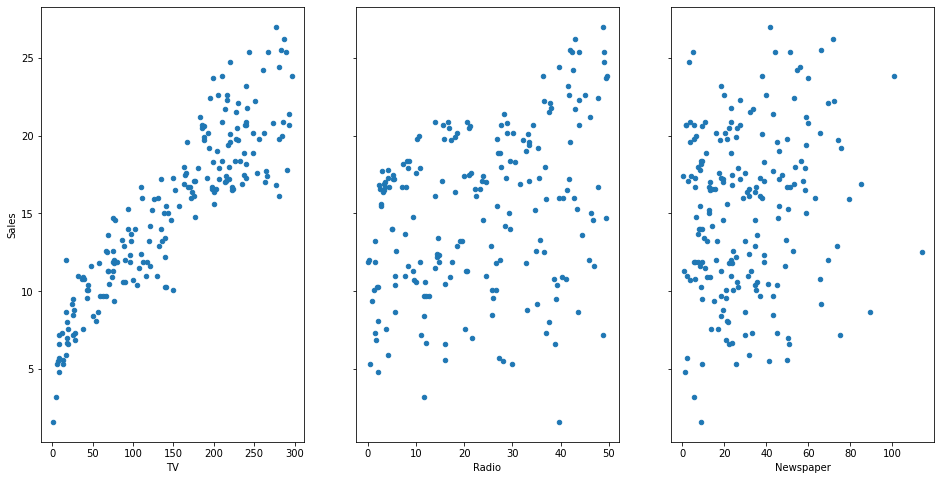

In [9]:
#Given the number of rows and columns , it returns a tuple ( fig , ax ), giving a single figure fig with an array of axes ax .
fig,axs = plt.subplots(1,3,sharey=True)
data.plot(kind='scatter',x='TV',y='Sales',ax=axs[0],figsize=(16,8))#plotting TV sales
data.plot(kind='scatter',x='Radio',y='Sales',ax=axs[1])#plotting Radio sales
data.plot(kind='scatter',x='Newspaper',y='Sales',ax=axs[2])#Plotting Newspaper sales

**Applying linear regresion analysis to estimate the relaionship b/w sales and TV ad spending**

In [54]:
feature_cols = ['TV']
x = data[feature_cols] #X is the ind. variable
y = data.Sales# and y is the dep. variable

In [55]:
from sklearn.linear_model import LinearRegression #importing linear regression model from sklearn
lm = LinearRegression()#initializing the model
lm.fit(x,y)#Fitting the model on x and y

LinearRegression()

now print the intercept and the coefficient of the resulting linear equation

In [56]:
#By interpreting the model coefficients we can say that a unit increases in TV
#ad spending is associated with a 0.05546477 unit increase in sales
print(lm.intercept_)
print(lm.coef_)

6.974821488229891
[0.05546477]


In [18]:
6.974821488229891+0.05546477*50# now we ave linear equation we can use this for prediction
#we can say that there was a new market where Tv ad spends were $50 ,000

9.74805998822989

In [19]:
X_new = pd.DataFrame({'TV':[50]})#prediction new x values
X_new.head()

,TV
0,50


In [57]:
lm.predict(X_new)#using the above equation we would now predict the sales of 9748 widgets in that market

array([ 7.01364683, 23.41457946])

In [21]:
# Let's make predictions for the smallest and largest observed values of X and 
#then and use the predicted values to plot the least squares line.
X_new = pd.DataFrame({'TV': [data.TV.min(),data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [22]:
preds = lm.predict(X_new)
preds

array([ 7.01364683, 23.41457946])

Initializing the scatter plot for TV and Sales.

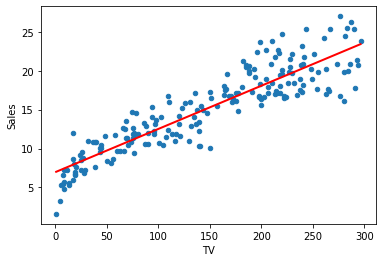

In [23]:
data.plot(kind='scatter',x='TV',y='Sales')
plt.plot(X_new,preds,c='red',linewidth=2)

In [27]:

import statsmodels.formula.api as smf
lm = smf.ols(formula='Sales ~ TV',data=data).fit()

In [29]:
lm.conf_int()

,0,1
Intercept,6.338740,7.610903
TV,0.051727,0.059203


In [30]:
lm.pvalues# The P Vvalues represent the possibility that the coefficient is actually zero.

Intercept    5.027719e-54
TV           7.927912e-74
dtype: float64

In this case the P value for TV is far less than 0.05 and hence we infer there is a relationship between TV ads and Sales

**How well does the model fit the data?**

The most common way to evaluate the overall fit of a linear model by using 
Rsquared value.

In [31]:
lm.rsquared

0.8121757029987414

The threshold for a good R squared value depends widely on the 
domain .Therefore, it's most useful as a tool for comparing different models.

**Multiple Linear Regression model.**

In [33]:
feature_cols = ['TV','Radio','Newspaper']# we use three variables to build the model.
X = data[feature_cols]
y = data.Sales

from sklearn import model_selection 
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(X,y,test_size=0.3, random_state=42)#creating a trained test.

Applying Linear Regression

In [34]:
lm = LinearRegression()
lm.fit(X,y)
print(lm.intercept_)
print(lm.coef_)

4.625124078808653
[0.05444578 0.10700123 0.00033566]


In [35]:
lm = LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression()

In [38]:
from numpy import sqrt
print(lm.intercept_)
print(lm.coef_)

predictions = lm.predict(xtest)
print(sqrt(mean_squared_error(ytest,predictions)))


4.743766701589685
[0.05358869 0.10270677 0.00793167]
1.5942471691143587


In [40]:
lm = smf.ols(formula='Sales~TV + Radio + Newspaper', data=data).fit()#Using the OLS regression results, we got a lot of the information in the model summary output.
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           8.13e-99
Time:                        06:00:19   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

from this output 

1. TV and Radio have significant P values, whereas newspaper does not. Thus we reject the null hypothesis for TV and radio.

There is no association b/w these features and sales. However we fail to reject the null hypothesis for the variable newspaper

2. TV and Radio ads spending are both positively associated with sales whwreas newspaper ad spending is slightly negatively associaed with sales. However this is irrelevant since we have failed to reject the null hypothesis for the variable newspaper.

3. This model has a higher R squared value 0.903 than a prev. model. which means this model provides a better fit to the data than a model that only includes the TV variable.

**Feature Selection**

How do we know what features need to be included in a linear model?

1. Try out different models and only keep the predictors in the mdel if they have small P values.

2. Check ehether the R squared value goes up when you add new predictors.

In [41]:
lm = smf.ols(formula='Sales~TV+Radio',data=data).fit()
lm.rsquared

0.9025896186081139

Observing o/p we get similar R squared values. R square will increase as we add more features to the model even if they are unrelated to the response. Thus selecting the model with the highest R squared is not a reliable approach for choosing best linear model.

In [42]:
lm = smf.ols(formula='Sales~TV + Radio + Newspaper',data=data).fit()
lm.rsquared

0.9025912899684558

Lets create a new feature called Sise and randomly assign observations to be small or large

In [43]:
import numpy as np
np.random.seed(12345)#Setting up random seed

nums = np.random.rand(len(data))
mask_large = nums >0.5

data['Size'] = 'small'#Assigning observations as small
data.loc[mask_large,'Size']='large'#and as large
data.head()

,TV,Radio,Newspaper,Sales,Size
0,230.1,37.8,69.2,22.1,large
1,44.5,39.3,45.1,10.4,small
2,17.2,45.9,69.3,12.0,small
3,151.5,41.3,58.5,16.5,small
4,180.8,10.8,58.4,17.9,large


Creating a dummy variables that represents the categories as a binary value.

In [44]:
data['IsLarge'] = data.Size.map({'small':0,'large':1})
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge
0,230.1,37.8,69.2,22.1,large,1
1,44.5,39.3,45.1,10.4,small,0
2,17.2,45.9,69.3,12.0,small,0
3,151.5,41.3,58.5,16.5,small,0
4,180.8,10.8,58.4,17.9,large,1


Lets redo the multipler linear regression and include the I S large predictor  

In [45]:
feature_cols = ['TV','Radio','Newspaper','IsLarge']
X = data[feature_cols]
y = data.Sales

lm = LinearRegression()
lm.fit(X,y)

zip(feature_cols,lm.coef_)

In [47]:
#Creating a new feature called area and randomly asssign observations to be rural, suburban or urban
np.random.seed(123456)

nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Area']='rural'
data.loc[mask_suburban,'Area']='suburban'
data.loc[mask_urban,'Area']='urban'
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area
0,230.1,37.8,69.2,22.1,large,1,rural
1,44.5,39.3,45.1,10.4,small,0,urban
2,17.2,45.9,69.3,12.0,small,0,rural
3,151.5,41.3,58.5,16.5,small,0,urban
4,180.8,10.8,58.4,17.9,large,1,suburban


In [58]:
#create a new feature called area and randomly assign observations to be rural, urban or suburban
area_dummies = pd.get_dummies(data.Area,prefix = 'Area').iloc[:,1:]#hre we create dummy variable
data=pd.concat([data,area_dummies],axis=1)
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area,Area_suburban,Area_urban,Area_suburban,Area_urban
0,230.1,37.8,69.2,22.1,large,1,rural,0,0,0,0
1,44.5,39.3,45.1,10.4,small,0,urban,0,1,0,1
2,17.2,45.9,69.3,12.0,small,0,rural,0,0,0,0
3,151.5,41.3,58.5,16.5,small,0,urban,0,1,0,1
4,180.8,10.8,58.4,17.9,large,1,suburban,1,0,1,0


In [59]:
#Let's include the two dummy variables in  the model
feature_cols = ['TV','Radio','Newspaper','IsLarge','Area_suburban','Area_urban']
X = data[feature_cols]
y = data.Sales

lm = LinearRegression()
lm.fit(X,y)

print(feature_cols,lm.coef_)

['TV', 'Radio', 'Newspaper', 'IsLarge', 'Area_suburban', 'Area_urban'] [ 0.05465513  0.10609595  0.0005616  -0.28326471 -0.03729729 -0.03729729
 -0.04051451 -0.04051451]


Considering all the other variables as fixed, being a suburban areas associated with an average decreases in sales of 106.56 widgets as compared to the baseli
ne level which is rural. Being as urban areas, associated with an aveg. increases of sales is 283.26 widgets as compared to rural